# 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# 데이터 로드

In [2]:
data = pd.read_csv('./result.csv')
data


,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,...,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing,Life expectancy
0,2015,0.831225,0.261880,-1.138088,-0.358384,-0.101739,-0.987357,0.250083,-3.400606,0.942863,...,-0.317913,-0.490445,0.359679,2.729099,2.685552,-0.750781,-0.627591,-0.450545,0.450545,65.0
1,2014,0.896482,0.278185,-1.138088,-0.357303,-0.163251,-1.012464,0.268074,-1.106887,0.951267,...,-0.317913,-0.488408,-0.221725,2.795474,2.728889,-0.765329,-0.658569,-0.450545,0.450545,59.9
2,2013,0.872011,0.294490,-1.138088,-0.357450,-0.169012,-1.037571,0.286064,-0.930447,0.930256,...,-0.317913,-0.487043,0.324790,2.839724,2.772227,-0.794425,-0.689547,-0.450545,0.450545,59.9
3,2012,0.904639,0.318948,-1.138088,-0.355058,0.049996,-1.062678,0.310052,-0.709897,1.094147,...,-0.317913,-0.484305,-0.163089,2.883973,2.837233,-0.828370,-0.720525,-0.450545,0.450545,59.5
4,2011,0.929110,0.335253,-1.138088,-0.389302,0.070995,-1.082763,0.334040,-0.665787,0.820995,...,-0.317913,-0.527749,-0.175590,2.950348,2.880570,-0.872014,-0.813460,-0.450545,0.450545,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650,2004,4.583464,-0.023460,-0.040434,-0.392721,-0.206086,-0.585649,0.004210,-0.709897,0.510023,...,6.028106,-0.499750,-0.005063,1.003360,0.973722,-1.099932,-0.906394,-0.450545,0.450545,44.3
2651,2003,4.518208,-0.031612,-0.116134,-0.392721,-0.116235,-0.605734,-0.001787,-3.356496,0.253680,...,6.615350,-0.499823,-0.007562,1.091860,1.082065,-1.046589,-0.813460,-0.450545,0.450545,44.5
2652,2002,-0.718612,-0.039765,-0.022770,-0.392721,-0.180720,-0.625820,-0.007784,-0.445237,0.257883,...,7.202593,-0.528192,-0.225241,-0.810878,-0.781445,-1.002945,-0.658569,-0.450545,0.450545,44.8
2653,2001,4.281654,-0.039765,-0.706596,-0.392721,-0.159813,-0.645905,-0.013780,-0.312907,0.102396,...,7.638290,-0.493000,-0.012221,-0.722379,-0.694771,-1.002945,-0.720525,-0.450545,0.450545,45.3


## 변수선택

In [3]:
df = data[['Schooling', 'HIV/AIDS', 'Adult Mortality', 'Life expectancy']]
df

,Schooling,HIV/AIDS,Adult Mortality,Life expectancy
0,-0.627591,-0.317913,0.831225,65.0
1,-0.658569,-0.317913,0.896482,59.9
2,-0.689547,-0.317913,0.872011,59.9
3,-0.720525,-0.317913,0.904639,59.5
4,-0.813460,-0.317913,0.929110,59.2
...,...,...,...,...
2650,-0.906394,6.028106,4.583464,44.3
2651,-0.813460,6.615350,4.518208,44.5
2652,-0.658569,7.202593,-0.718612,44.8
2653,-0.720525,7.638290,4.281654,45.3


## 데이터 확인

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Schooling        2655 non-null   float64
 1   HIV/AIDS         2655 non-null   float64
 2   Adult Mortality  2655 non-null   float64
 3   Life expectancy  2655 non-null   float64
dtypes: float64(4)
memory usage: 83.1 KB


# 모델링

## 1) 교차 검증 x

### 모델 생성, 학습, 예측

In [5]:
# 특성과 타겟 변수 설정
X = df.drop('Life expectancy', axis=1)
y = df['Life expectancy']

# 데이터를 학습용과 테스트용으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVR 모델 생성 및 학습
svr_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_model.fit(X_train_scaled, y_train)

# 테스트 데이터로 예측
y_pred_test = svr_model.predict(X_test_scaled)

### 예측 성능 확인

In [6]:
# 모델 성능 평가 메트릭 계산
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# 결과 출력
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Adjusted R-squared 계산
num_features = X_train.shape[1]
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - num_features - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

Mean Squared Error: 9.1730880836793
Mean Absolute Error: 2.073161430842411
R-squared: 0.9002714946730471
Adjusted R-squared: 0.8997037802214706


### 서포트 벡터 (Support Vector)와 듀얼 계수 (Dual Coefficient) 확인

In [7]:
# 듀얼 계수의 크기순으로 정렬
sorted_indices = np.argsort(np.abs(svr_model.dual_coef_[0]))[::-1]

# 상위 5개의 서포트 벡터와 듀얼 계수 출력
support_vectors = svr_model.support_vectors_
top_n = 5
for i in range(top_n):
    index = sorted_indices[i]
    sv = support_vectors[index]
    coef = svr_model.dual_coef_[0][index]
    print(f"Support Vector {i+1}: {sv}, Dual Coefficient: {coef}")

Support Vector 1: [ 1.01665007 -0.31417469 -0.50182405], Dual Coefficient: 1000.0
Support Vector 2: [ 0.05979953 -0.2938807   0.06365738], Dual Coefficient: -1000.0
Support Vector 3: [ 1.633973   -0.31417469 -0.76793296], Dual Coefficient: 1000.0
Support Vector 4: [ 1.10924851 -0.31417469 -0.58498308], Dual Coefficient: -1000.0
Support Vector 5: [-2.62555522  0.31493906  1.48567685], Dual Coefficient: -1000.0


### 예측 결과 시각화

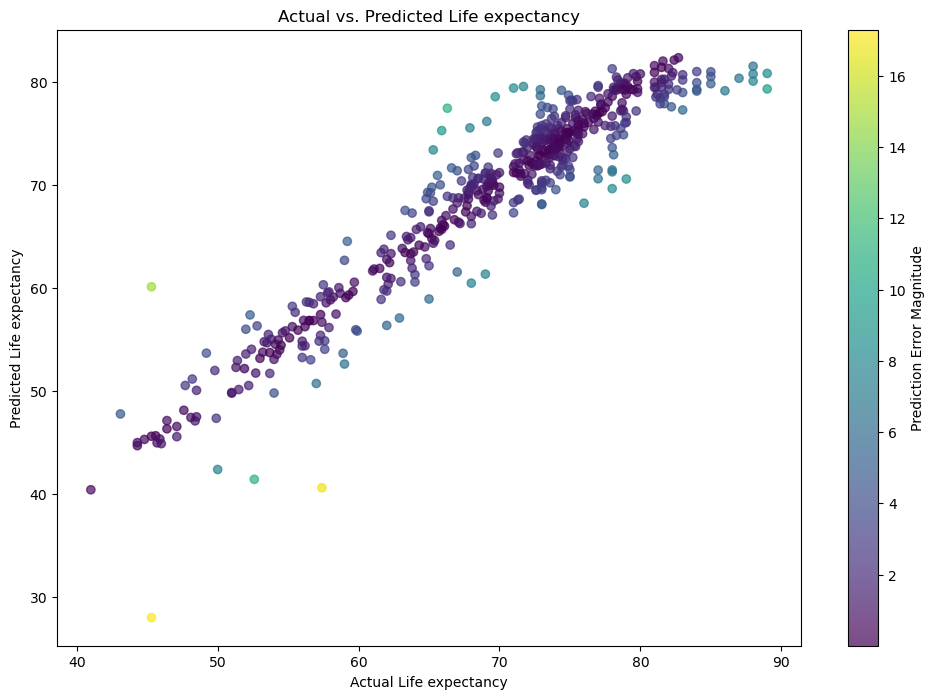

In [8]:
error = y_test - y_pred_test

# 예측 오차의 크기에 따라 색상 할당
colors = np.abs(error)

# 산점도 시각화
plt.figure(figsize=(12, 8))  # 그림의 크기 조절
plt.scatter(y_test, y_pred_test, c=colors, cmap='viridis', alpha=0.7)
plt.colorbar(label='Prediction Error Magnitude')
plt.xlabel("Actual Life expectancy")
plt.ylabel("Predicted Life expectancy")
plt.title("Actual vs. Predicted Life expectancy")
plt.show()

## 잔차의 정규성, 등분산성, 독립성 가정 확인

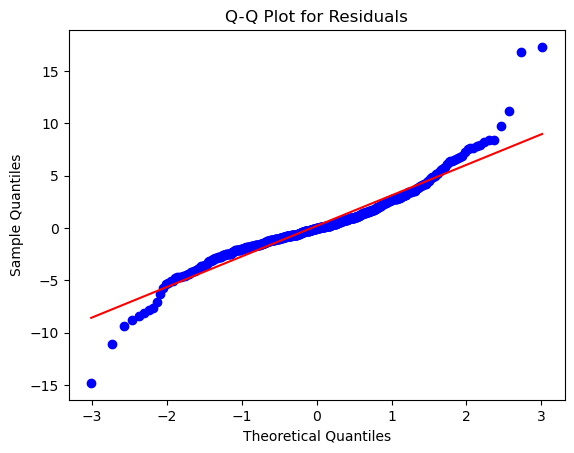

In [9]:
from scipy import stats

# Q-Q plot////
residuals = y_test - y_pred_test

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot for Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

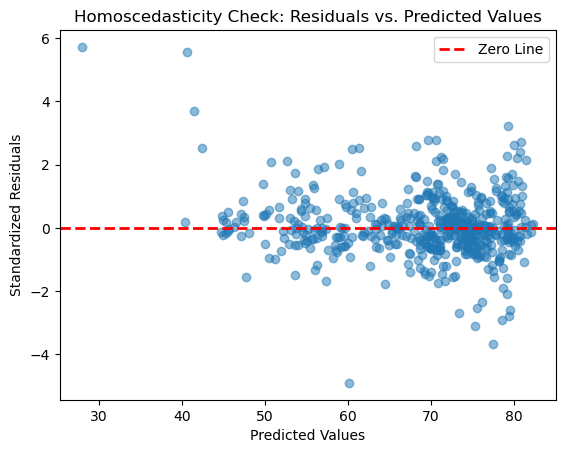

In [10]:
# 잔차의 등분산성
# 표준화된 잔차 계산
residuals = y_test - y_pred_test
std_residuals = residuals / np.std(residuals)

# 산점도 그래프 그리기
plt.scatter(y_pred_test, std_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Line')

# 그래프에 레이블 및 제목 추가
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.title('Homoscedasticity Check: Residuals vs. Predicted Values')
plt.legend()
plt.show()

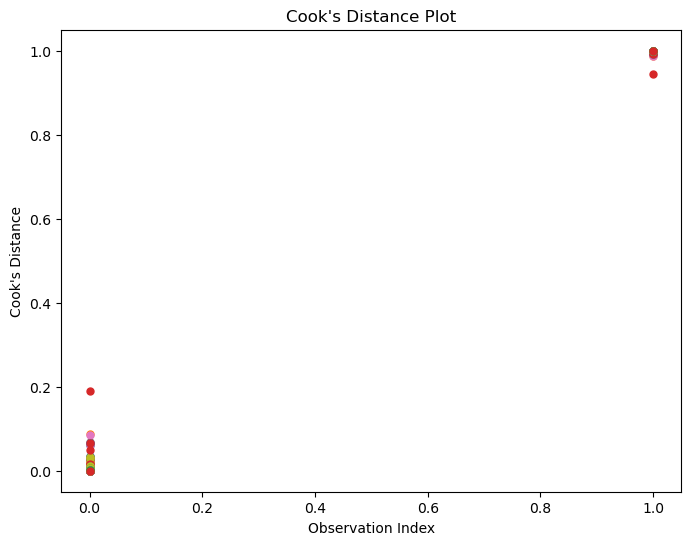

In [11]:
from statsmodels.stats.outliers_influence import OLSInfluence
import statsmodels.api as sm

# 독립 변수 행렬에 상수 항 추가
X_train_const = sm.add_constant(X_train)

# 선형 회귀 모델 적합
model = sm.OLS(y_train, X_train_const)
results = model.fit()

# 모델을 사용하여 값 예측
y_pred = results.predict(X_train_const)

# 잔차 계산
residuals = y_train - y_pred

# Cook's distance 계산
influence = OLSInfluence(results)
cooks_distance = influence.cooks_distance

plt.figure(figsize=(8, 6))
plt.plot(cooks_distance, 'o', markersize=5)
plt.title("Cook's Distance Plot")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()

## 2) 교차 검증,  비선형 커널 (Non-linear Kernel)

### 모델 생성, 학습, 예측

In [13]:
X = df.drop('Life expectancy', axis=1)
y = df['Life expectancy']

# 데이터를 학습용, 교차 검증용, 테스트용으로 나누기
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_cv = scaler.fit_transform(X_train_cv)
X_test = scaler.transform(X_test)

# SVR 모델 생성
svr_model = SVR(kernel='rbf', C=1e3, gamma=0.1)

# 교차 검증 수행
kf = KFold(n_splits=8, shuffle=True, random_state=42)  # 8-fold 교차 검증
cv_scores = cross_val_score(svr_model, X_train_cv, y_train_cv, cv=kf, scoring='neg_mean_squared_error', verbose=1)

# 교차 검증 평균 MSE 출력
avg_cv_mse = -cv_scores.mean()
print(f'Average Cross-Validation MSE: {avg_cv_mse}')

# 테스트 데이터로 예측
svr_model.fit(X_train_cv, y_train_cv)  # 전체 학습 데이터로 모델 학습
y_pred_test = svr_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   10.3s finished


Average Cross-Validation MSE: 7.939367995723144


### 예측 성능 확인

In [14]:
# MSE
mse = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error: {mse: .3f}')

# MAE
mae = mean_absolute_error(y_test, y_pred_test)
print(f'Mean Absolute Error: {mae: .3f}')

# r2
r2 = r2_score(y_test, y_pred_test)
print(f'R-squared: {r2: .3f}')

# Adjusted R-squared
# 독립 변수의 수
num_features = X_train_cv.shape[1]
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - num_features - 1)
print(f'Adjusted R-squared: {adjusted_r2: .3f}')

Mean Squared Error:  9.173
Mean Absolute Error:  2.073
R-squared:  0.900
Adjusted R-squared:  0.900


### 서포트 벡터 (Support Vector)와 듀얼 계수 (Dual Coefficient) 확인

In [15]:
# 듀얼 계수의 크기순으로 정렬
sorted_indices = np.argsort(np.abs(svr_model.dual_coef_[0]))[::-1]

# 상위 5개의 서포트 벡터와 듀얼 계수 출력
support_vectors = svr_model.support_vectors_
top_n = 5
for i in range(top_n):
    index = sorted_indices[i]
    sv = support_vectors[index]
    coef = svr_model.dual_coef_[0][index]
    print(f"Support Vector {i+1}: {sv}, Dual Coefficient: {coef}")

Support Vector 1: [ 1.01665007 -0.31417469 -0.50182405], Dual Coefficient: 1000.0
Support Vector 2: [ 0.05979953 -0.2938807   0.06365738], Dual Coefficient: -1000.0
Support Vector 3: [ 1.633973   -0.31417469 -0.76793296], Dual Coefficient: 1000.0
Support Vector 4: [ 1.10924851 -0.31417469 -0.58498308], Dual Coefficient: -1000.0
Support Vector 5: [-2.62555522  0.31493906  1.48567685], Dual Coefficient: -1000.0


### 예측 결과 시각화

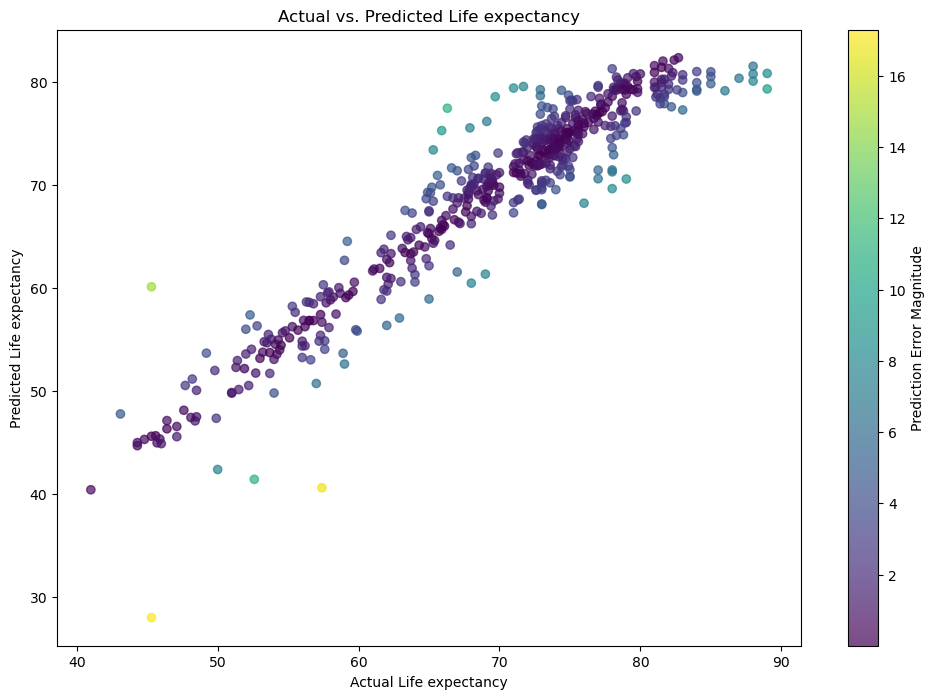

In [16]:
# 예측 오차의 크기에 따라 색상 할당
colors = np.abs(error)

# 산점도 시각화
plt.figure(figsize=(12, 8))  # 그림의 크기 조절
plt.scatter(y_test, y_pred_test, c=colors, cmap='viridis', alpha=0.7)
plt.colorbar(label='Prediction Error Magnitude')
plt.xlabel("Actual Life expectancy")
plt.ylabel("Predicted Life expectancy")
plt.title("Actual vs. Predicted Life expectancy")
plt.show()

## 잔차의 정규성, 등분산성, 독립성 가정 확인

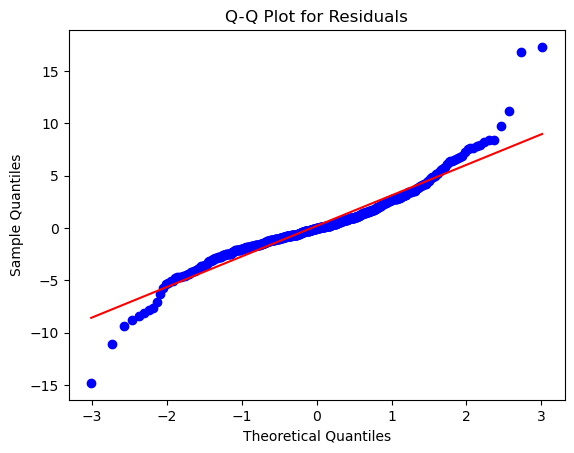

In [17]:

# Q-Q plot////
residuals = y_test - y_pred_test

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot for Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

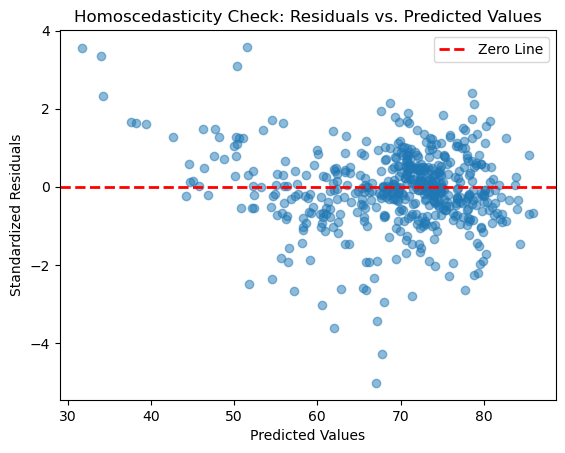

In [23]:
# 잔차의 등분산성
# 표준화된 잔차 계산
residuals = y_test - y_pred_test
std_residuals = residuals / np.std(residuals)

# 산점도 그래프 그리기
plt.scatter(y_pred_test, std_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Line')

# 그래프에 레이블 및 제목 추가
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.title('Homoscedasticity Check: Residuals vs. Predicted Values')
plt.legend()
plt.show()

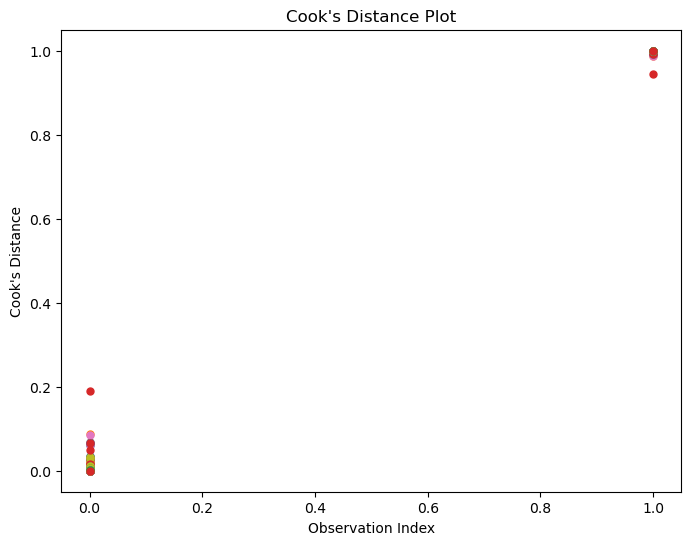

In [24]:


# 독립 변수 행렬에 상수 항 추가
X_train_const = sm.add_constant(X_train)

# 선형 회귀 모델 적합
model = sm.OLS(y_train, X_train_const)
results = model.fit()

# 모델을 사용하여 값 예측
y_pred = results.predict(X_train_const)

# 잔차 계산
residuals = y_train - y_pred

# Cook's distance 계산
influence = OLSInfluence(results)
cooks_distance = influence.cooks_distance

plt.figure(figsize=(8, 6))
plt.plot(cooks_distance, 'o', markersize=5)
plt.title("Cook's Distance Plot")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()

## 최적화 진행

In [55]:
from sklearn.model_selection import GridSearchCV

# SVR 모델 정의
svr_model = SVR(kernel='rbf')

# 탐색할 하이퍼파라미터 그리드 정의
param_grid = {
    'C': [50, 70, 100, 200, 500],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(svr_model, param_grid, cv=kf, scoring='neg_mean_squared_error', verbose=2)

# 그리드 서치 수행
grid_search.fit(X_train_cv, y_train_cv)

# 최적 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# 최적 모델 추출
best_svr_model = grid_search.best_estimator_

# 테스트 데이터로 예측
y_pred_test = best_svr_model.predict(X_test)

# 테스트 데이터에 대한 성능 측정
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# 조정된 R 제곱 계산
n = len(y_test)
k = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n - 1) / (n - k - 1))

print(f'Test MSE: {mse_test: .3f}')
print(f'Test MAE: {mae_test: .3f}')
print(f'Test R^2: {r2_test: .3f}')
print(f'Test Adjusted R^2: {adjusted_r2_test: .3f}')


Fitting 8 folds for each of 25 candidates, totalling 200 fits
[CV] END ......................................C=50, gamma=1; total time=   0.5s
[CV] END ......................................C=50, gamma=1; total time=   0.5s
[CV] END ......................................C=50, gamma=1; total time=   0.4s
[CV] END ......................................C=50, gamma=1; total time=   0.5s
[CV] END ......................................C=50, gamma=1; total time=   0.6s
[CV] END ......................................C=50, gamma=1; total time=   0.5s
[CV] END ......................................C=50, gamma=1; total time=   0.4s
[CV] END ......................................C=50, gamma=1; total time=   0.5s
[CV] END ....................................C=50, gamma=0.1; total time=   0.4s
[CV] END ....................................C=50, gamma=0.1; total time=   0.3s
[CV] END ....................................C=50, gamma=0.1; total time=   0.4s
[CV] END ....................................C=

[CV] END ..................................C=100, gamma=0.01; total time=   0.3s
[CV] END ..................................C=100, gamma=0.01; total time=   0.3s
[CV] END ..................................C=100, gamma=0.01; total time=   0.3s
[CV] END .................................C=100, gamma=0.001; total time=   0.3s
[CV] END .................................C=100, gamma=0.001; total time=   0.3s
[CV] END .................................C=100, gamma=0.001; total time=   0.3s
[CV] END .................................C=100, gamma=0.001; total time=   0.3s
[CV] END .................................C=100, gamma=0.001; total time=   0.3s
[CV] END .................................C=100, gamma=0.001; total time=   0.3s
[CV] END .................................C=100, gamma=0.001; total time=   0.3s
[CV] END .................................C=100, gamma=0.001; total time=   0.4s
[CV] END ................................C=100, gamma=0.0001; total time=   0.2s
[CV] END ...................

D:\anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


Test MSE:  7.599
Test MAE:  1.898
Test R^2:  0.917
Test Adjusted R^2:  0.917


## 예측결과 시각화

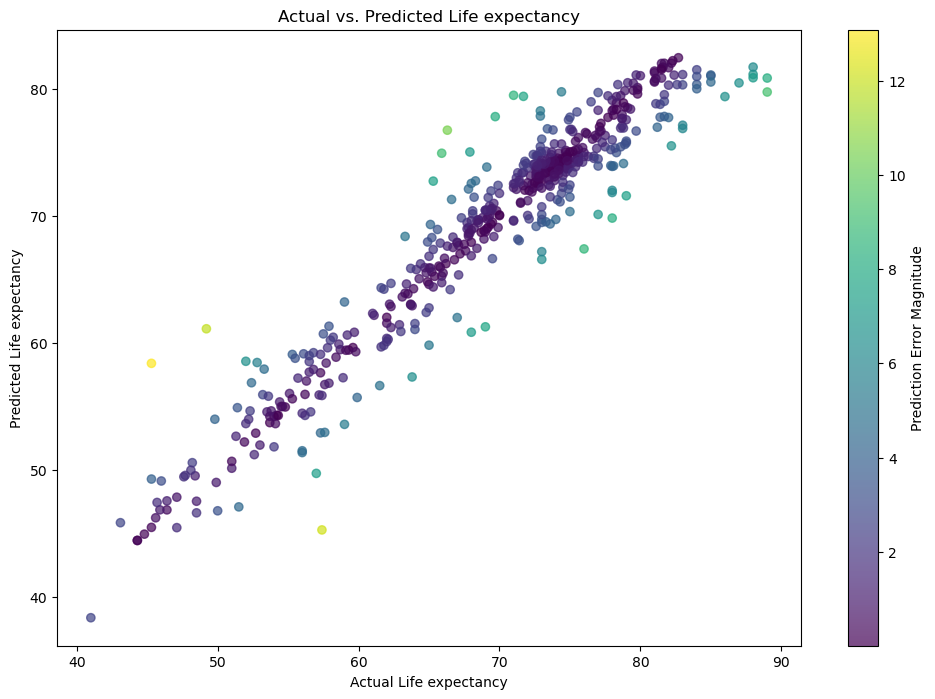

In [56]:
# 예측 오차의 크기에 따라 색상 할당
error = y_test - y_pred_test
colors = np.abs(error)

# 산점도 시각화
plt.figure(figsize=(12, 8))  # 그림의 크기 조절
plt.scatter(y_test, y_pred_test, c=colors, cmap='viridis', alpha=0.7)
plt.colorbar(label='Prediction Error Magnitude')
plt.xlabel("Actual Life expectancy")
plt.ylabel("Predicted Life expectancy")
plt.title("Actual vs. Predicted Life expectancy")
plt.show()

## 잔차의 정규성, 등분산성, 독립성 가정 확인

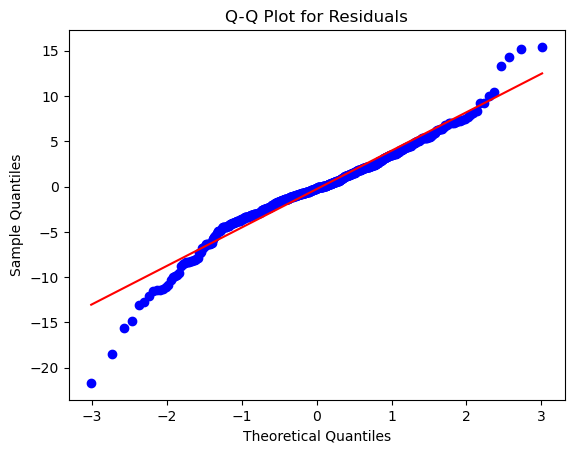

In [57]:
from scipy import stats

# Q-Q plot////
residuals = y_test - y_pred_test_linear

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot for Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

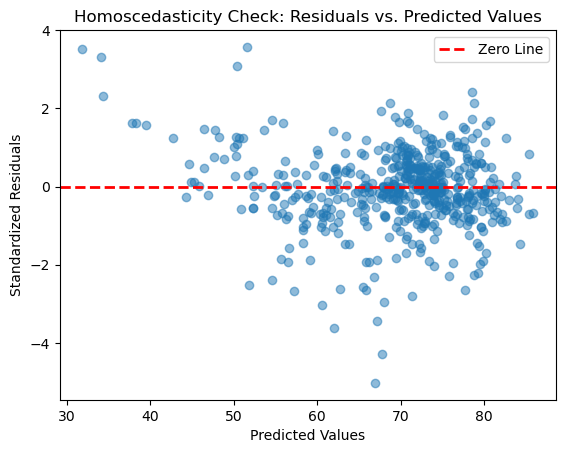

In [58]:
# 잔차의 등분산성
# 표준화된 잔차 계산
residuals = y_test - y_pred_test_linear
std_residuals = residuals / np.std(residuals)

# 산점도 그래프 그리기
plt.scatter(y_pred_test_linear, std_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Line')

# 그래프에 레이블 및 제목 추가
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.title('Homoscedasticity Check: Residuals vs. Predicted Values')
plt.legend()
plt.show()

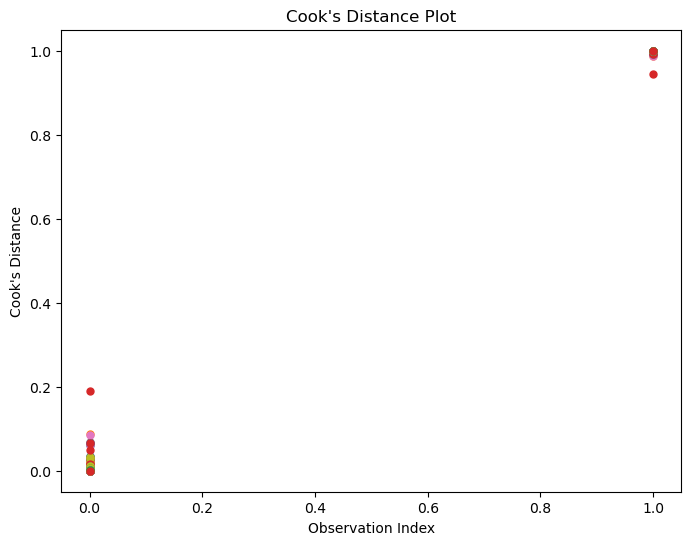

In [59]:
# 독립 변수 행렬에 상수 항 추가
X_train_const = sm.add_constant(X_train)

# 선형 회귀 모델 적합
model = sm.OLS(y_train, X_train_const)
results = model.fit()

# 모델을 사용하여 값 예측
y_pred = results.predict(X_train_const)

# 잔차 계산
residuals = y_train - y_pred

# Cook's distance 계산
influence = OLSInfluence(results)
cooks_distance = influence.cooks_distance

plt.figure(figsize=(8, 6))
plt.plot(cooks_distance, 'o', markersize=5)
plt.title("Cook's Distance Plot")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()

## 3)  교차 검증, 선형 커널 (Linear Kernel)

### 모델 생성, 학습, 예측

In [26]:
X = df.drop('Life expectancy', axis=1)
y = df['Life expectancy']

# 데이터를 학습용, 교차 검증용, 테스트용으로 나누기
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_cv = scaler.fit_transform(X_train_cv)
X_test = scaler.transform(X_test)

# SVR 모델 생성
svr_model = SVR(kernel='linear', C=1e3, gamma=0.1)

# 교차 검증 수행
kf = KFold(n_splits=8, shuffle=True, random_state=42)  # 8-fold 교차 검증
cv_scores = cross_val_score(svr_model, X_train_cv, y_train_cv, cv=kf, scoring='neg_mean_squared_error', verbose=1)

# 교차 검증 평균 MSE 출력
avg_cv_mse = -cv_scores.mean()
print(f'Average Cross-Validation MSE: {avg_cv_mse}')

# 테스트 데이터로 예측
svr_model.fit(X_train_cv, y_train_cv)  # 전체 학습 데이터로 모델 학습
y_pred_test = svr_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.6min finished


Average Cross-Validation MSE: 20.288857429399165


### 예측 성능 확인

In [27]:
# MSE
mse = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error: {mse}')

# MAE
mae = mean_absolute_error(y_test, y_pred_test)
print(f'Mean Absolute Error: {mae}')

# r2
r2 = r2_score(y_test, y_pred_test)
print(f'R-squared: {r2}')

# Adjusted R-squared
# 독립 변수의 수
num_features = X_train_cv.shape[1]
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - num_features - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

Mean Squared Error: 18.7197317690138
Mean Absolute Error: 3.102778316788694
R-squared: 0.7964817461235565
Adjusted R-squared: 0.795323198188776


### 회귀계수 확인

In [28]:
# SVR 모델의 회귀 계수 확인
coefficients = svr_model.coef_

# 변수의 이름과 함께 출력
for feature, coef in zip(X.columns, coefficients):
    print(f"Variable: {feature}, Coefficient: {coef}")

Variable: Schooling, Coefficient: [ 4.88910183 -2.29639443 -3.48546966]


### 예측 결과 시각화

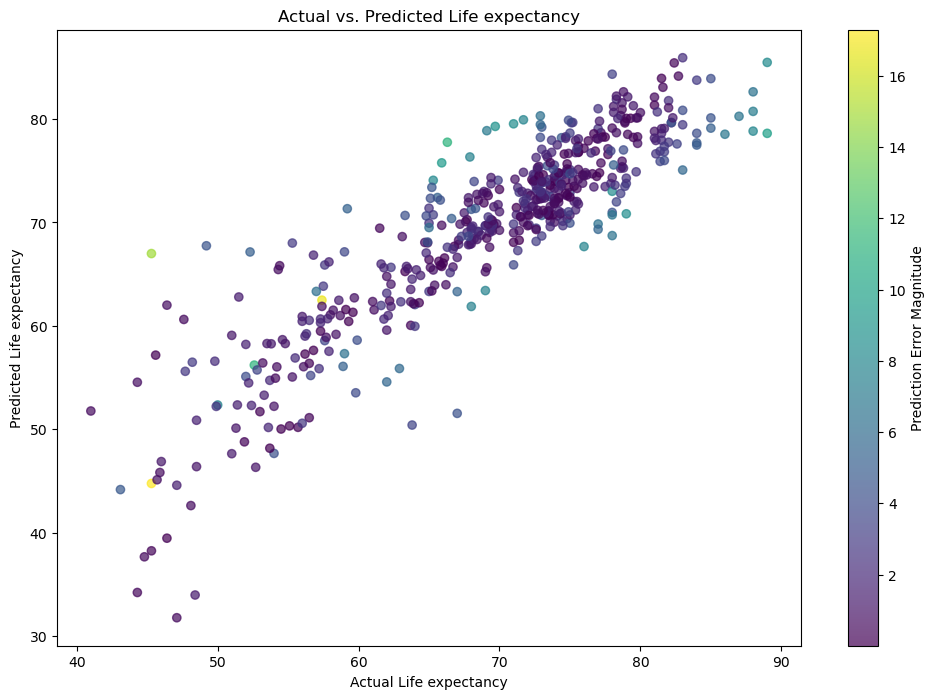

In [29]:
# 예측 오차의 크기에 따라 색상 할당
colors = np.abs(error)

# 산점도 시각화
plt.figure(figsize=(12, 8))  # 그림의 크기 조절
plt.scatter(y_test, y_pred_test, c=colors, cmap='viridis', alpha=0.7)
plt.colorbar(label='Prediction Error Magnitude')
plt.xlabel("Actual Life expectancy")
plt.ylabel("Predicted Life expectancy")
plt.title("Actual vs. Predicted Life expectancy")
plt.show()

## 잔차의 정규성, 등분산성, 독립성 가정 확인

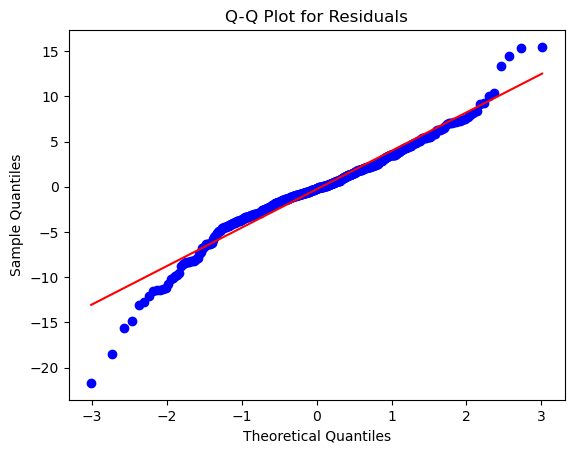

In [30]:
from scipy import stats

# Q-Q plot////
residuals = y_test - y_pred_test

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot for Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

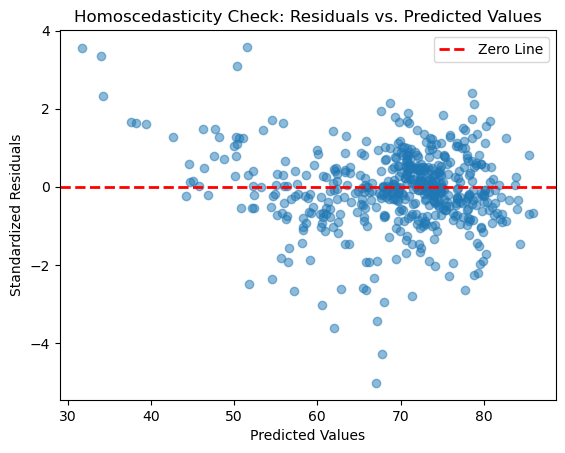

In [31]:
# 잔차의 등분산성
# 표준화된 잔차 계산
residuals = y_test - y_pred_test
std_residuals = residuals / np.std(residuals)

# 산점도 그래프 그리기
plt.scatter(y_pred_test, std_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Line')

# 그래프에 레이블 및 제목 추가
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.title('Homoscedasticity Check: Residuals vs. Predicted Values')
plt.legend()
plt.show()

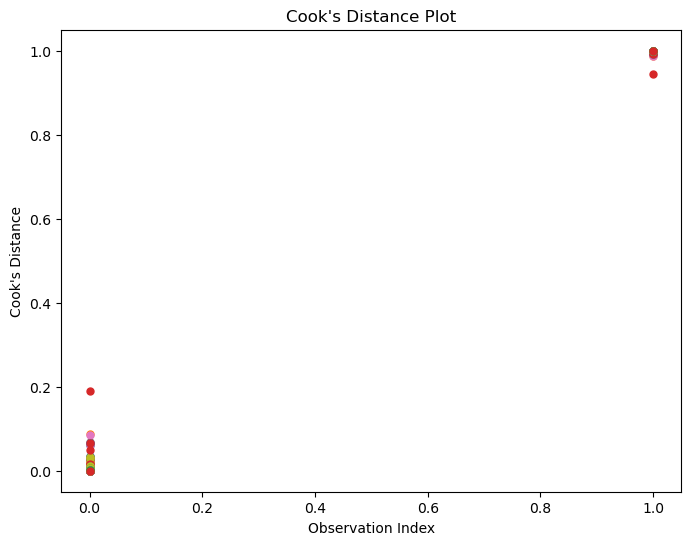

In [32]:
# 독립 변수 행렬에 상수 항 추가
X_train_const = sm.add_constant(X_train)

# 선형 회귀 모델 적합
model = sm.OLS(y_train, X_train_const)
results = model.fit()

# 모델을 사용하여 값 예측
y_pred = results.predict(X_train_const)

# 잔차 계산
residuals = y_train - y_pred

# Cook's distance 계산
influence = OLSInfluence(results)
cooks_distance = influence.cooks_distance

plt.figure(figsize=(8, 6))
plt.plot(cooks_distance, 'o', markersize=5)
plt.title("Cook's Distance Plot")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()

## 최적화 진행

In [33]:
from sklearn.model_selection import GridSearchCV

# SVR 모델 정의 (이번에는 선형 커널 사용)
svr_model_linear = SVR(kernel='linear')

# 탐색할 하이퍼파라미터 그리드 정의
param_grid_linear = {
    'C': [0.1, 0.5, 1, 2, 5],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

# 그리드 서치 객체 생성
grid_search_linear = GridSearchCV(svr_model_linear, param_grid_linear, cv=kf, scoring='neg_mean_squared_error', verbose=1)

# 그리드 서치 수행
grid_search_linear.fit(X_train_cv, y_train_cv)

# 최적 하이퍼파라미터 출력
best_params_linear = grid_search_linear.best_params_
print(f'Best Hyperparameters for Linear Kernel: {best_params_linear}')

# 최적 모델 추출
best_svr_model_linear = grid_search_linear.best_estimator_

# 테스트 데이터로 예측
y_pred_test_linear = best_svr_model_linear.predict(X_test)

# 테스트 데이터에 대한 성능 측정
mse_test_linear = mean_squared_error(y_test, y_pred_test_linear)
mae_test_linear = mean_absolute_error(y_test, y_pred_test_linear)
r2_test_linear = r2_score(y_test, y_pred_test_linear)

# 조정된 R 제곱 계산
n_linear = len(y_test)
k_linear = X_test.shape[1]
adjusted_r2_test_linear = 1 - ((1 - r2_test_linear) * (n_linear - 1) / (n_linear - k_linear - 1))

print(f'Test MSE for Linear Kernel: {mse_test_linear: .3f}')
print(f'Test MAE for Linear Kernel: {mae_test_linear: .3f}')
print(f'Test R^2 for Linear Kernel: {r2_test_linear: .3f}')
print(f'Test Adjusted R^2 for Linear Kernel: {adjusted_r2_test_linear: .3f}')


Fitting 8 folds for each of 25 candidates, totalling 200 fits
Best Hyperparameters for Linear Kernel: {'C': 1, 'gamma': 1}
Test MSE for Linear Kernel:  18.686
Test MAE for Linear Kernel:  3.100
Test R^2 for Linear Kernel:  0.797
Test Adjusted R^2 for Linear Kernel:  0.796


In [ ]:
### 예측 결과 시각화

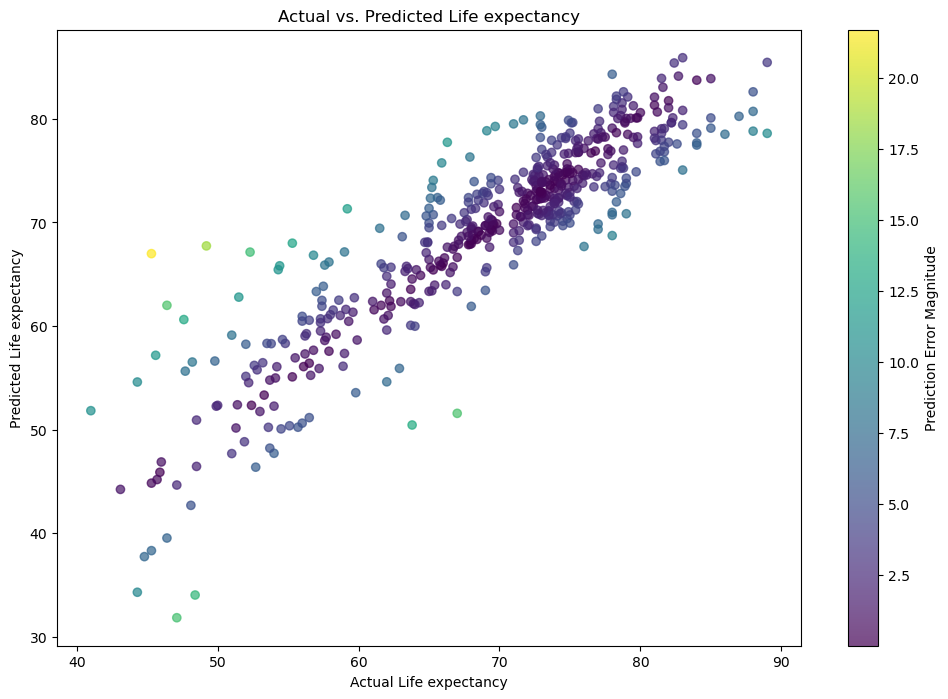

In [39]:
# 예측 오차의 크기에 따라 색상 할당
error = y_test - y_pred_test_linear

colors = np.abs(error)

# 산점도 시각화
plt.figure(figsize=(12, 8))  # 그림의 크기 조절
plt.scatter(y_test, y_pred_test_linear, c=colors, cmap='viridis', alpha=0.7)
plt.colorbar(label='Prediction Error Magnitude')
plt.xlabel("Actual Life expectancy")
plt.ylabel("Predicted Life expectancy")
plt.title("Actual vs. Predicted Life expectancy")
plt.show()

## 잔차의 정규성, 등분산성, 독립성 가정 확인

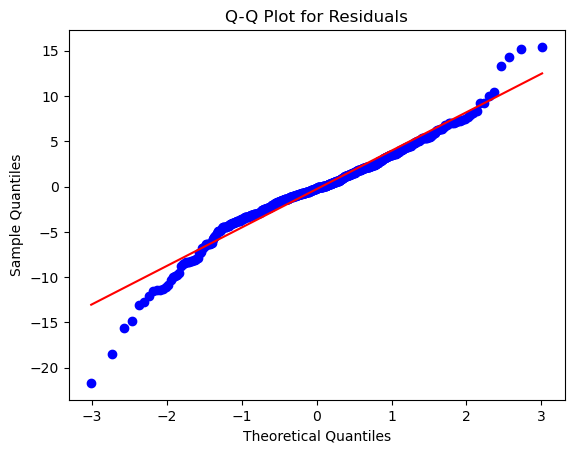

In [41]:
from scipy import stats

# Q-Q plot////
residuals = y_test - y_pred_test_linear

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot for Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

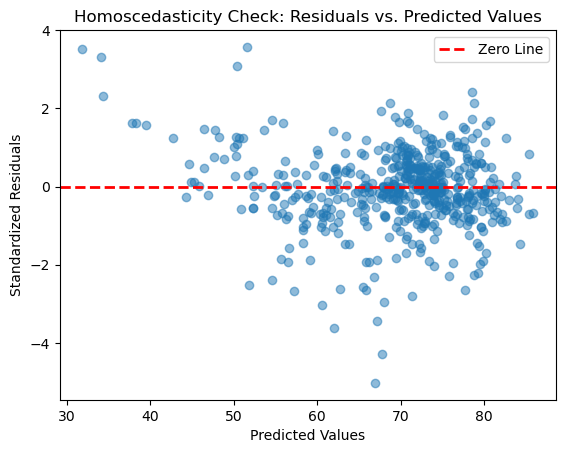

In [45]:
# 잔차의 등분산성
# 표준화된 잔차 계산
residuals = y_test - y_pred_test_linear
std_residuals = residuals / np.std(residuals)

# 산점도 그래프 그리기
plt.scatter(y_pred_test_linear, std_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Line')

# 그래프에 레이블 및 제목 추가
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.title('Homoscedasticity Check: Residuals vs. Predicted Values')
plt.legend()
plt.show()

## 4) 교차 검증, 다항식 커널(poly 또는 polynomial)

### 모델 생성, 학습, 예측

In [46]:
X = df.drop('Life expectancy', axis=1)
y = df['Life expectancy']

# 데이터를 학습용, 교차 검증용, 테스트용으로 나누기
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_cv = scaler.fit_transform(X_train_cv)
X_test = scaler.transform(X_test)

# SVR 모델 생성 (다항식 커널 사용)
poly_degree = 3  # 예시로 3차 다항식 사용
svr_model_poly = SVR(kernel='poly', degree=poly_degree)

# 교차 검증 수행
kf = KFold(n_splits=8, shuffle=True, random_state=42)  # 8-fold 교차 검증
cv_scores = cross_val_score(svr_model_poly, X_train_cv, y_train_cv, cv=kf, scoring='neg_mean_squared_error')

# 교차 검증 평균 MSE 출력
avg_cv_mse = -cv_scores.mean()
print(f'Average Cross-Validation MSE: {avg_cv_mse}')

# 테스트 데이터로 예측
svr_model_poly.fit(X_train_cv, y_train_cv)
y_pred_test = svr_model_poly.predict(X_test)


Average Cross-Validation MSE: 43.26833290457442


### 예측 성능 확인

In [47]:
# MSE
mse = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error: {mse}')

# MAE
mae = mean_absolute_error(y_test, y_pred_test)
print(f'Mean Absolute Error: {mae}')

# r2
r2 = r2_score(y_test, y_pred_test)
print(f'R-squared: {r2}')

# Adjusted R-squared
# 독립 변수의 수
num_features = X_train_cv.shape[1]
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - num_features - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

Mean Squared Error: 72.4198123016778
Mean Absolute Error: 4.9339867139530575
R-squared: 0.21266212958810382
Adjusted R-squared: 0.20818013032579696


### 다항식의 차수 및 상수항 확인

In [48]:
# 다항식의 차수 및 상수항 출력
print(f'Polynomial Degree: {svr_model_poly.degree}')
print(f'Coefficient of the polynomial kernel (coef0): {svr_model_poly.coef0}')

Polynomial Degree: 3
Coefficient of the polynomial kernel (coef0): 0.0


### 예측 결과 시각화

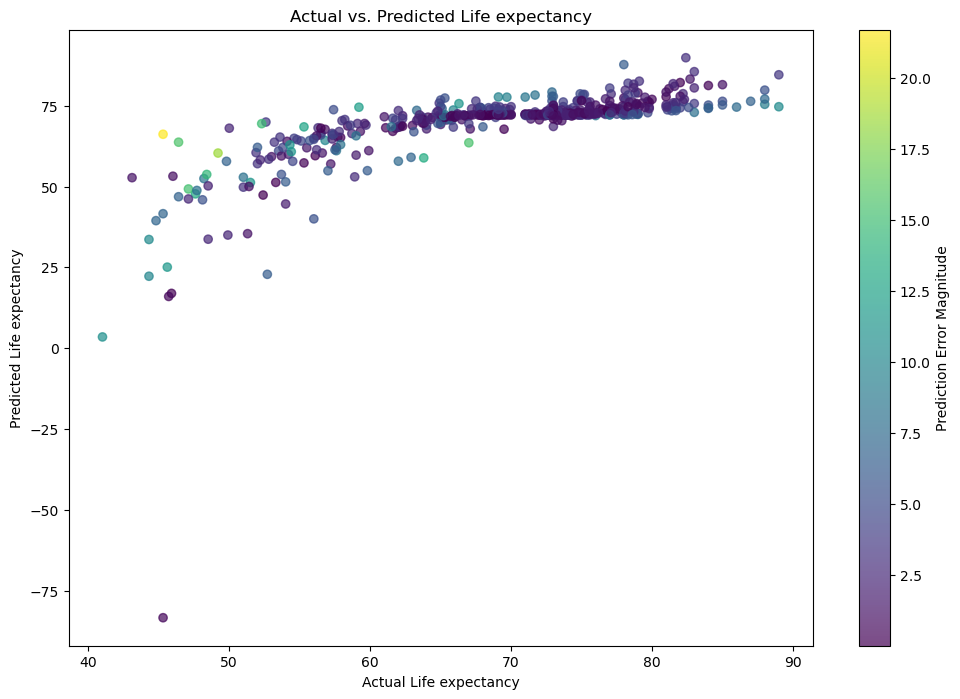

In [49]:
# 예측 오차의 크기에 따라 색상 할당
colors = np.abs(error)

# 산점도 시각화
plt.figure(figsize=(12, 8))  # 그림의 크기 조절
plt.scatter(y_test, y_pred_test, c=colors, cmap='viridis', alpha=0.7)
plt.colorbar(label='Prediction Error Magnitude')
plt.xlabel("Actual Life expectancy")
plt.ylabel("Predicted Life expectancy")
plt.title("Actual vs. Predicted Life expectancy")
plt.show()

## 잔차의 정규성, 등분산성, 독립성 가정 확인

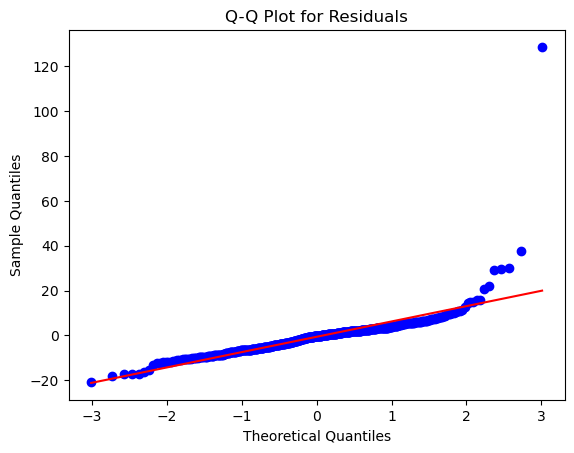

In [50]:
from scipy import stats

# Q-Q plot////
residuals = y_test - y_pred_test

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot for Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

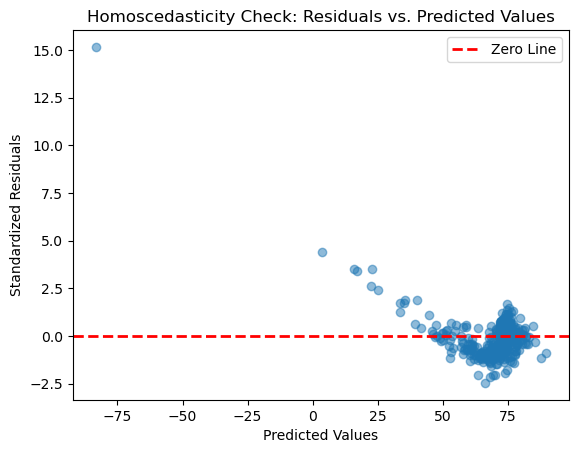

In [51]:
# 잔차의 등분산성
# 표준화된 잔차 계산
residuals = y_test - y_pred_test
std_residuals = residuals / np.std(residuals)

# 산점도 그래프 그리기
plt.scatter(y_pred_test, std_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Line')

# 그래프에 레이블 및 제목 추가
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.title('Homoscedasticity Check: Residuals vs. Predicted Values')
plt.legend()
plt.show()

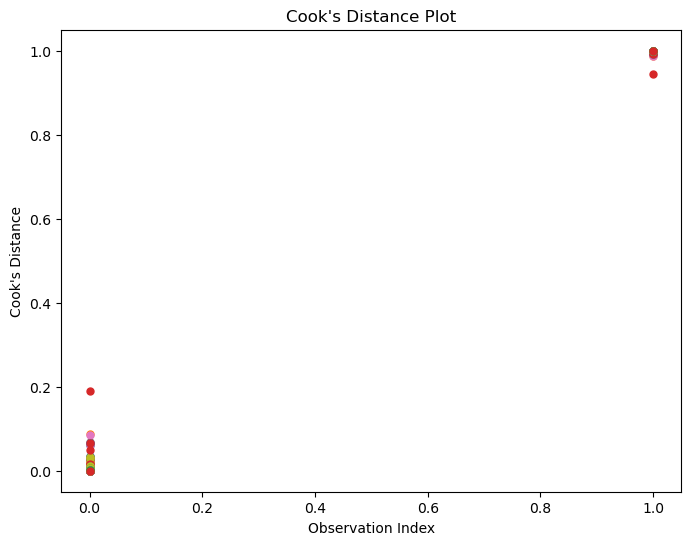

In [52]:
# 독립 변수 행렬에 상수 항 추가
X_train_const = sm.add_constant(X_train)

# 선형 회귀 모델 적합
model = sm.OLS(y_train, X_train_const)
results = model.fit()

# 모델을 사용하여 값 예측
y_pred = results.predict(X_train_const)

# 잔차 계산
residuals = y_train - y_pred

# Cook's distance 계산
influence = OLSInfluence(results)
cooks_distance = influence.cooks_distance

plt.figure(figsize=(8, 6))
plt.plot(cooks_distance, 'o', markersize=5)
plt.title("Cook's Distance Plot")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()

## 최적화 진행 -1차


In [ ]:
from sklearn.model_selection import GridSearchCV

# 데이터를 학습용, 교차 검증용, 테스트용으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVR 모델 생성 (다항식 커널 사용)
svr_model_poly = SVR(kernel='poly')

# 다양한 하이퍼 파라미터 조합을 시도하기 위한 그리드 설정
param_grid = {
    'degree': [2, 3, 4],  # 다항식 차수
    'C': [0.1, 1, 10],     # 규제 강도
    'coef0': [0, 1, 2]     # 다항식 및 시그모이드 커널에 대한 독립적인 계수
}

# 8-fold 교차 검증을 사용한 그리드 서치
grid_search = GridSearchCV(svr_model_poly, param_grid, cv=8, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# 최적의 모델 및 하이퍼 파라미터 출력
best_svr_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f'Best SVR Model: {best_svr_model}')
print(f'Best Hyperparameters: {best_params}')

# 테스트 데이터로 예측
y_pred_test = best_svr_model.predict(X_test_scaled)
#결과=>C:0.1 coef0: 2 degree:4

Fitting 8 folds for each of 27 candidates, totalling 216 fits


In [ ]:
# MSE
mse = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error: {mse:.3f}')

# MAE
mae = mean_absolute_error(y_test, y_pred_test)
print(f'Mean Absolute Error: {mae:.3f}')

# r2
r2 = r2_score(y_test, y_pred_test)
print(f'R-squared: {r2:.3f}')

# Adjusted R-squared
# 독립 변수의 수
num_features = X_train_cv.shape[1]
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - num_features - 1)
print(f'Adjusted R-squared: {adjusted_r2: .3f}')

In [ ]:
from sklearn.model_selection import GridSearchCV
# 특성과 타겟 변수 설정
X = df.drop('Life expectancy', axis=1)
y = df['Life expectancy']

# 데이터를 학습용, 교차 검증용, 테스트용으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVR 모델 생성 (다항식 커널 사용)
svr_model_poly = SVR(kernel='poly')

# 다양한 하이퍼 파라미터 조합을 시도하기 위한 그리드 설정
param_grid = {
    'degree': [4, 5, 6],  # 다항식 차수
    'C': [0.01, 0.1],     # 규제 강도
    'coef0': [2, 4, 6]     # 다항식 및 시그모이드 커널에 대한 독립적인 계수
}

# 8-fold 교차 검증을 사용한 그리드 서치
grid_search = GridSearchCV(svr_model_poly, param_grid, cv=8, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train_scaled, y_train)

# 최적의 모델 및 하이퍼 파라미터 출력
best_svr_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f'Best SVR Model: {best_svr_model}')
print(f'Best Hyperparameters: {best_params}')

# 테스트 데이터로 예측
y_pred_test = best_svr_model.predict(X_test_scaled)

#결과=>C: 0.1 coef: 4 degree: 4

## => 6_SVR.ipynb 파일에서 이어서 진행했습니다.
### 6_최적화SVR.ipynb 파일 내용: poly 커널 사용 시 1차 최적의 하이퍼 파라미터를 바탕으로 다시 범위를 조정해 그리드 서치를 진행 후 얻은 하이퍼파라미터를 이용해 모델 적용 후 시각화.